In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import pickle

import itertools
from collections import OrderedDict

In [2]:
p = plt.imread('/Users/archydeberker/Downloads/piano.jpeg')
p = p[:,:,0]

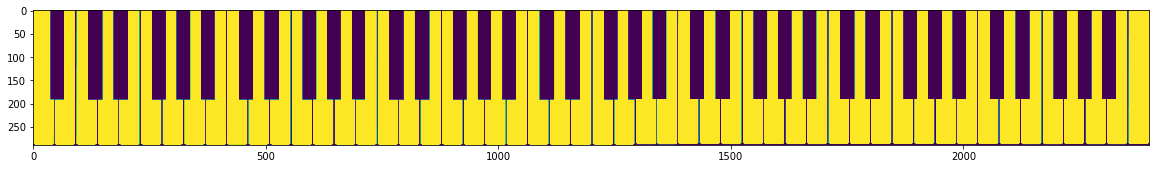

In [5]:
plt.figure(figsize=(20,10))
plt.imshow(p)

In [67]:
# Take a slice across the middle of the image
p_slice_low = p[250,:]

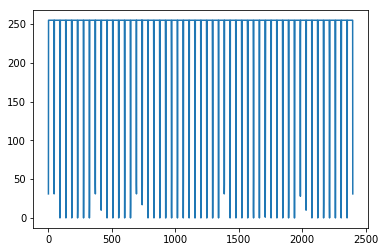

In [68]:
plt.plot(p_slice_low)

In [69]:
yf = scipy.fftpack.fft(p_slice_low)

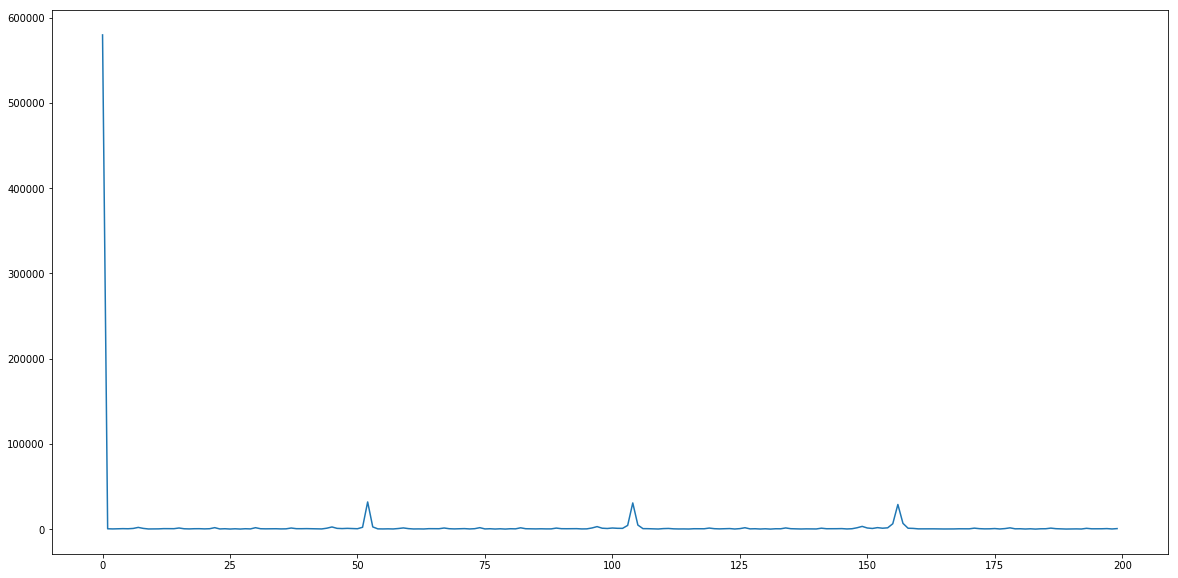

In [70]:
plt.figure(figsize=(20,10))
plt.plot(np.abs(yf[0:200]))
plt.show()

In [73]:
key_width = len(p_slice_low)/52

In [74]:
key_ids = {c:int(key_width*(c)) for c in range(52)}

In [75]:
new_p = np.copy(p)

In [76]:
new_p[:, key_ids[45]:key_ids[46]] = new_p[:, key_ids[45]:key_ids[46]] - 50

In [79]:
key_width

46.15384615384615

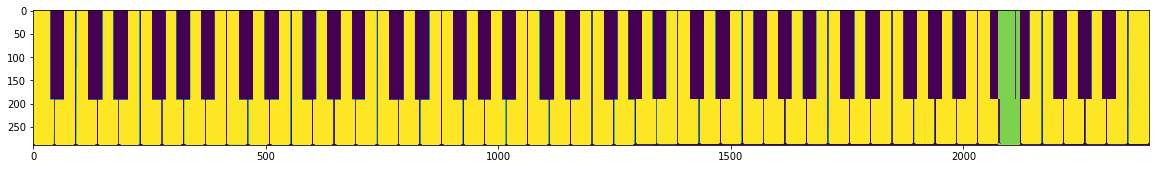

In [77]:
plt.figure(figsize=(20,10))
plt.imshow(new_p)

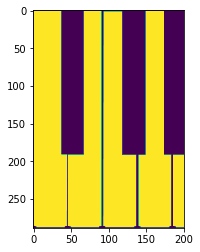

In [103]:
# Black key width
plt.figure()
plt.imshow(p[:,0:200])

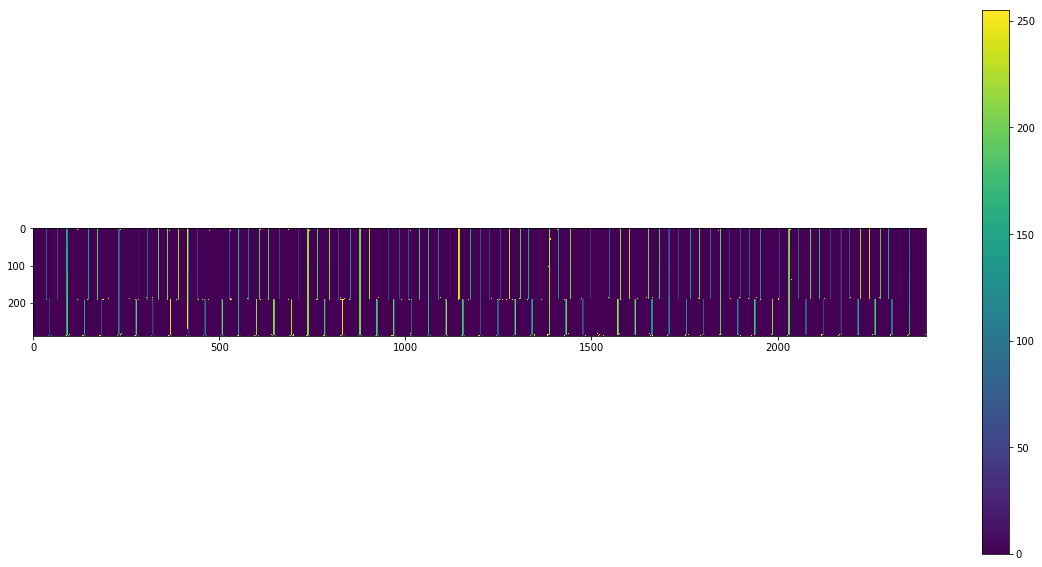

In [112]:
plt.figure(figsize=(20,10))
plt.imshow(np.diff(p))
plt.colorbar()

In [126]:
p_slice_high = p[5,:]
diff_p = np.diff(p.astype(np.float))


In [127]:
sum(diff_p > 100)

array([285,   1,   1, ...,   0,   0,   0])

In [128]:
sum(diff_p < -100)

array([  0,   0,   0, ...,   1,   0, 284])

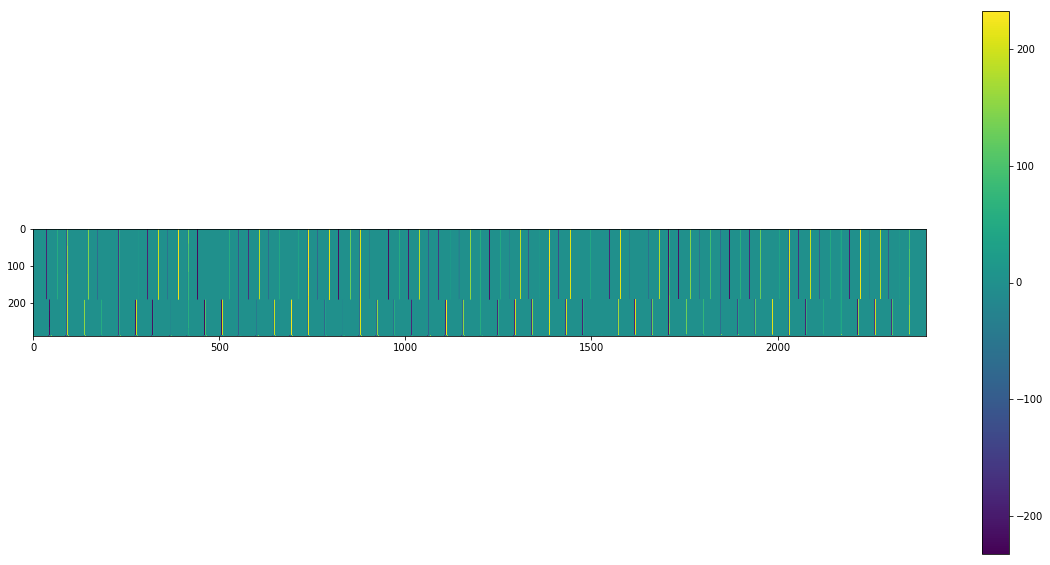

In [133]:
plt.figure(figsize=(20,10))
plt.imshow(diff_p)
plt.colorbar()

In [136]:
diff_p[10,:] > 100

In [137]:
sum(poss_diff)

60

In [131]:
diff_p = np.diff(p.astype(np.float))

# We're looking for 36 black keys
x_val = 20
up_crit = 100
down_crit = -100
space_crit = 350
spacer = 25
min_distance = 23
key_on = []
key_off = []
for i in range(diff_p.shape[1]):
    if diff_p[x_val, i] < down_crit:
        
        if sum(abs(diff_p[x_val, i:i+spacer])) < space_crit:
            if len(key_on) > 0:
                if i - key_on[-1] > min_distance:
                    key_on.append(i)
            else:
                key_on.append(i)

            


In [133]:
len(key_on)

37

In [134]:
len(key_off)

0

In [135]:
p_copy = np.copy(p)
bk_width = 32
bk_height = 191

black_keys = {}
for i_key, i in enumerate(key_on):
    p_copy[:bk_height, i:i+bk_width] = p_copy[:bk_height, i:i+bk_width] +100
    black_keys[i_key] = {'x' :(i, i+bk_width),
                        'y' : (0, bk_height)}
    

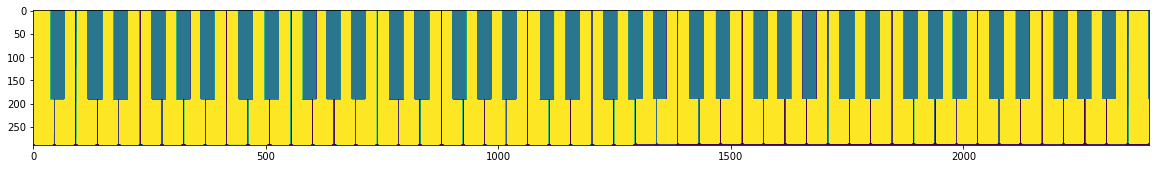

In [136]:
plt.figure(figsize=(20,10))
plt.imshow(p_copy)

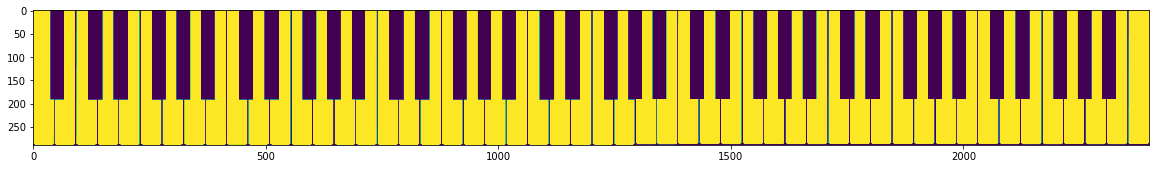

In [137]:
plt.figure(figsize=(20,10))
plt.imshow(p)

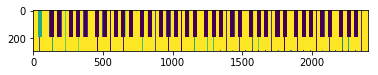

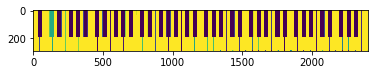

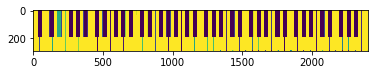

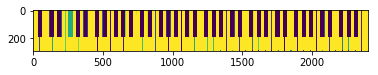

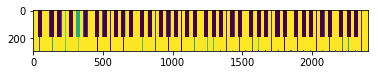

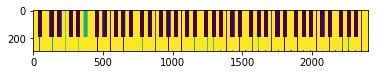

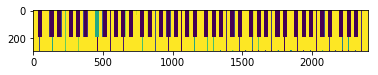

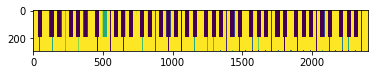

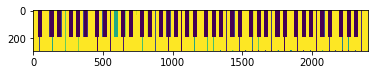

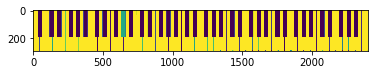

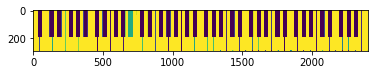

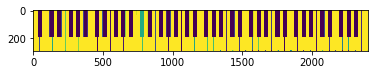

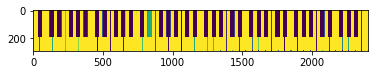

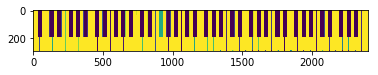

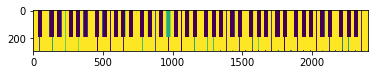

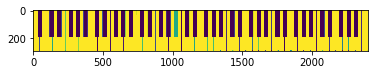

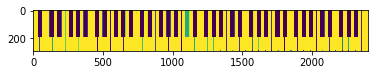

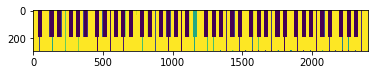

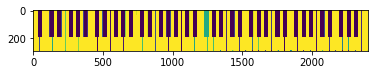

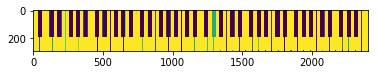

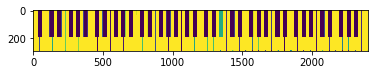

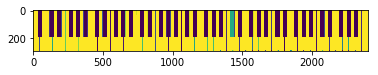

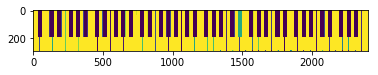

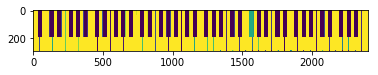

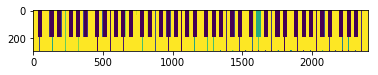

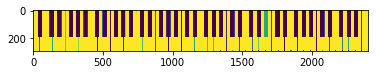

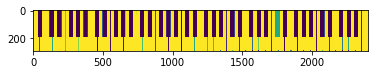

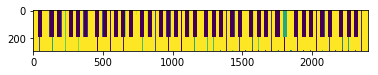

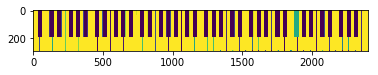

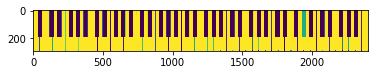

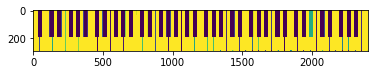

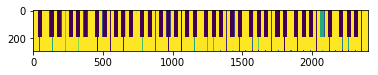

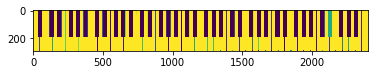

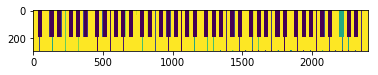

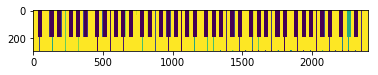

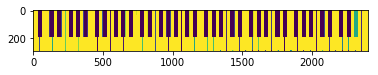

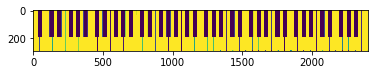

In [138]:
for i in black_keys:
    p_copy = np.copy(p)
    x1=black_keys[i]['x'][0]
    x2=black_keys[i]['x'][1]
    y1=black_keys[i]['y'][0]
    y2=black_keys[i]['y'][1]
    p_copy[y1:y2, x1:x2] =  p_copy[y1:y2, x1:x2] -100
    plt.imshow(p_copy)
    plt.show()

In [139]:
len(black_keys)

37

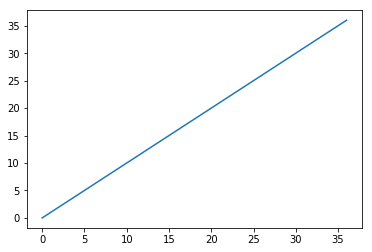

In [140]:
plt.plot(black_keys.keys())

In [156]:
black_key_notes = ['A#', 'C#', 'D#', 'F#', 'G#']
white_key_notes = ['A','B', 'C', 'D', 'E', 'F', 'G', ]

octaves = [str(x) for x in [0, 1, 2, 3, 4, 5, 6, 7, 8]]

black_key_ids = list(itertools.product(black_key_notes, octaves))
black_key_ids.sort(key=lambda x: x[1])

white_key_ids = itertools.product(white_key_notes, octaves)



In [157]:
def permute_sort_join(list1, list2):
    new_list= list(itertools.product(list1, list2))
    new_list.sort(key=lambda x: x[1])
    new_list = [x[0] + x[1] for x in new_list]
    
    return new_list

In [158]:
black_key_ids = permute_sort_join(black_key_notes, octaves)
white_key_ids = permute_sort_join(white_key_notes, octaves)

In [159]:
black_keys
black_key_ids

['A#0',
 'C#0',
 'D#0',
 'F#0',
 'G#0',
 'A#1',
 'C#1',
 'D#1',
 'F#1',
 'G#1',
 'A#2',
 'C#2',
 'D#2',
 'F#2',
 'G#2',
 'A#3',
 'C#3',
 'D#3',
 'F#3',
 'G#3',
 'A#4',
 'C#4',
 'D#4',
 'F#4',
 'G#4',
 'A#5',
 'C#5',
 'D#5',
 'F#5',
 'G#5',
 'A#6',
 'C#6',
 'D#6',
 'F#6',
 'G#6',
 'A#7',
 'C#7',
 'D#7',
 'F#7',
 'G#7',
 'A#8',
 'C#8',
 'D#8',
 'F#8',
 'G#8']

In [160]:
key_map = {}
max_keys = 36
for i, value in enumerate(black_key_ids):
    if i < max_keys-1:
        key_map[value] = black_keys[i]

In [161]:
key_map = OrderedDict(key_map)

In [162]:
key_map

OrderedDict([('A#0', {'x': (36, 68), 'y': (0, 191)}),
             ('C#0', {'x': (117, 149), 'y': (0, 191)}),
             ('D#0', {'x': (172, 204), 'y': (0, 191)}),
             ('F#0', {'x': (254, 286), 'y': (0, 191)}),
             ('G#0', {'x': (307, 339), 'y': (0, 191)}),
             ('A#1', {'x': (360, 392), 'y': (0, 191)}),
             ('C#1', {'x': (441, 473), 'y': (0, 191)}),
             ('D#1', {'x': (496, 528), 'y': (0, 191)}),
             ('F#1', {'x': (578, 610), 'y': (0, 191)}),
             ('G#1', {'x': (631, 663), 'y': (0, 191)}),
             ('A#2', {'x': (684, 716), 'y': (0, 191)}),
             ('C#2', {'x': (765, 797), 'y': (0, 191)}),
             ('D#2', {'x': (820, 852), 'y': (0, 191)}),
             ('F#2', {'x': (902, 934), 'y': (0, 191)}),
             ('G#2', {'x': (955, 987), 'y': (0, 191)}),
             ('A#3', {'x': (1008, 1040), 'y': (0, 191)}),
             ('C#3', {'x': (1088, 1120), 'y': (0, 191)}),
             ('D#3', {'x': (1144, 1176), 'y': 

In [163]:
p.shape

(289, 2400)

In [164]:
key_height = p.shape[1]
white_keys = {}
for i, val in key_ids.items():
    white_keys[i] = {'x': (val,int(val+key_width)),
                     'y': (0, key_height)}

In [165]:

max_keys = 52
for i, value in enumerate(white_key_ids):
    if i < max_keys-1:
        key_map[value] = white_keys[i]

In [166]:
key_map

OrderedDict([('A#0', {'x': (36, 68), 'y': (0, 191)}),
             ('C#0', {'x': (117, 149), 'y': (0, 191)}),
             ('D#0', {'x': (172, 204), 'y': (0, 191)}),
             ('F#0', {'x': (254, 286), 'y': (0, 191)}),
             ('G#0', {'x': (307, 339), 'y': (0, 191)}),
             ('A#1', {'x': (360, 392), 'y': (0, 191)}),
             ('C#1', {'x': (441, 473), 'y': (0, 191)}),
             ('D#1', {'x': (496, 528), 'y': (0, 191)}),
             ('F#1', {'x': (578, 610), 'y': (0, 191)}),
             ('G#1', {'x': (631, 663), 'y': (0, 191)}),
             ('A#2', {'x': (684, 716), 'y': (0, 191)}),
             ('C#2', {'x': (765, 797), 'y': (0, 191)}),
             ('D#2', {'x': (820, 852), 'y': (0, 191)}),
             ('F#2', {'x': (902, 934), 'y': (0, 191)}),
             ('G#2', {'x': (955, 987), 'y': (0, 191)}),
             ('A#3', {'x': (1008, 1040), 'y': (0, 191)}),
             ('C#3', {'x': (1088, 1120), 'y': (0, 191)}),
             ('D#3', {'x': (1144, 1176), 'y': 

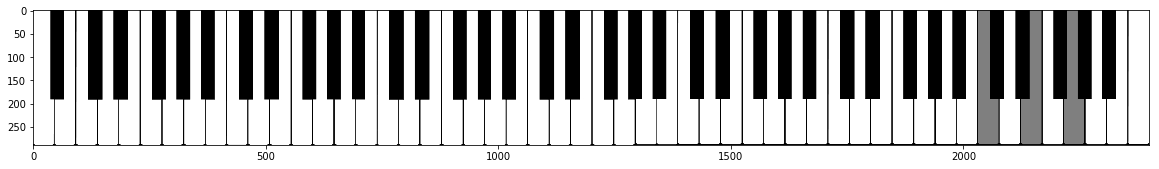

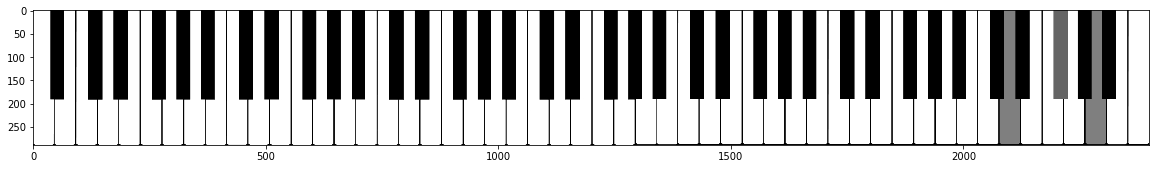

In [181]:
input_chord = [['C6', 'E6', 'G6'],
              ['D6','F#6', 'A7']
              ]

def reorder_chord(chord):
    """ Reorder so that all white notes are first."""
    
    return sorted(chord, key = lambda x: len(x))

def play_chords(input_chord):
    """ Produce a sequence of images corresponding to a series of notes.
    
    input_chord is a list of lists. Each sub-list contains the notes to be played for a single timestep (i.e.) a single
    image"""
    
    for chord in input_chord:
        chord = reorder_chord(chord)
        p_copy = np.copy(p)
        for note in chord:
            
            x1=key_map[note]['x'][0]
            x2=key_map[note]['x'][1]
            y1=key_map[note]['y'][0]
            y2=key_map[note]['y'][1]
            if '#' not in note:
                p_copy[y1:y2, x1:x2] =  p_copy[y1:y2, x1:x2]/2
            else:
                p_copy[y1:y2, x1:x2] =  p_copy[y1:y2, x1:x2] + 100

        plt.figure(figsize=(20,10))
        plt.imshow(p_copy, cmap='gray')
        plt.show()

play_chords(input_chord)

In [169]:
key_map['F#6']

{'x': (2193, 2225), 'y': (0, 191)}

In [186]:
pickle.dump(key_map, open('key_map.pkl', 'wb'))